In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('dados_credito.csv.csv')
df.head()

,status_conta,duracao,historico_credito,finalidade,valor_credito,poupanca,tempo_emprego,taxa_parcela,sexo_estado_civil,garantia,...,ativo,idade,outros_planos,habitacao,numero_creditos,emprego,dependentes,telefone,trabalhador_estrangeiro,classe
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [6]:
df['classe'] = df['classe'].map({1: 1, 2: 0})
X = df.drop('classe', axis=1)
y = df['classe']

In [7]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
categorical_cols = X_treino.select_dtypes(include=['object']).columns


X_treino_encoded = pd.get_dummies(X_treino, columns=categorical_cols, drop_first=True)
X_teste_encoded = pd.get_dummies(X_teste, columns=categorical_cols, drop_first=True)


X_treino_encoded, X_teste_encoded = X_treino_encoded.align(X_teste_encoded, join='inner', axis=1, fill_value=0)

escalador = StandardScaler()
X_treino_escalado = escalador.fit_transform(X_treino_encoded)
X_teste_escalado = escalador.transform(X_teste_encoded)

print("Data successfully encoded and scaled.")

Data successfully encoded and scaled.


In [29]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier()
modelo.fit(X_treino_escalado, y_treino)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
y_predito = modelo.predict(X_teste_escalado)

In [31]:
acuracia = accuracy_score(y_teste, y_predito)
print(f'Acurácia: {acuracia:.2f}')

Acurácia: 0.76


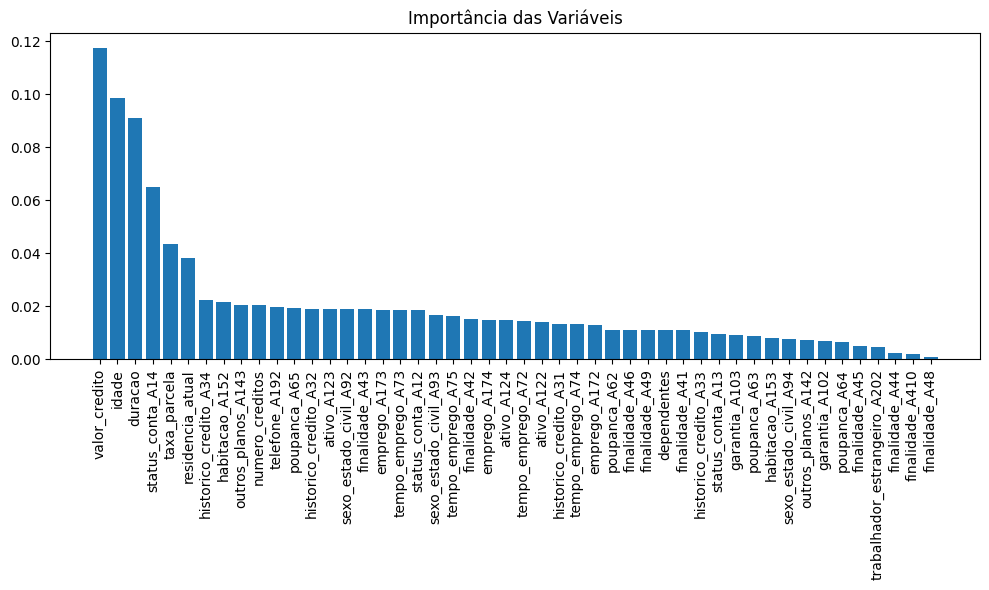

In [33]:
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
nomes_colunas = X_treino_encoded.columns.to_numpy() 

plt.figure(figsize=(10, 6))
plt.title('Importância das Variáveis')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), nomes_colunas[indices], rotation=90)
plt.tight_layout()
plt.show()

In [27]:
!pip install lime


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [34]:
explicacao.save_to_file('explicacao_lime.html')

In [35]:
explicacao.as_list()


[('finalidade_A48 <= -0.09', -0.07107851196355819),
 ('finalidade_A41 <= -0.34', -0.06263296746478408),
 ('status_conta_A14 <= -0.82', -0.06133798476975437),
 ('trabalhador_estrangeiro_A202 <= -0.19', -0.05987245839214812),
 ('historico_credito_A34 <= -0.64', -0.057773095124433994),
 ('status_conta_A13 <= -0.26', -0.05237162079385003),
 ('emprego_A174 <= -0.44', 0.04780066285804745),
 ('historico_credito_A33 <= -0.32', -0.046528121944061356),
 ('poupanca_A64 <= -0.23', -0.0456045751538764),
 ('taxa_parcela <= -0.86', 0.04276515899540182)]

In [36]:
[('feature_3 > 2.5', -0.15), ('feature_7 <= 1.0', 0.22), ...]


[('feature_3 > 2.5', -0.15), ('feature_7 <= 1.0', 0.22), Ellipsis]

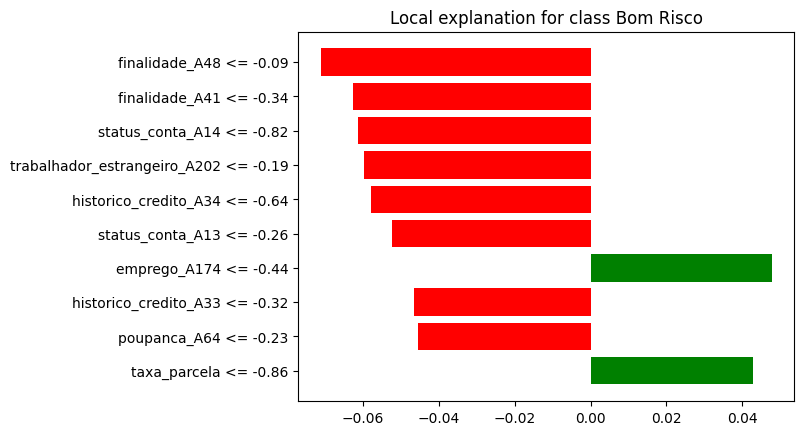

In [37]:
fig = explicacao.as_pyplot_figure()
fig.show()
